In [2]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Downloading necessary NLTK data
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    WordNetLemmatizer().lemmatize('running')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')
try:
    SentimentIntensityAnalyzer().polarity_scores('good')
except LookupError:
    nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sufya\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sufya\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sufya\AppData\Roaming\nltk_data...


In [7]:
df = pd.read_csv("Emirates Airways Reviews.csv")

In [9]:
df.head(5)

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""14 hour horrendous experience""",11th August 2024,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi to Boston via Dubai,August 2024,1.0,1.0,3.0,3.0,2.0,3.0,2,no,4,We were 2 people travelling together and on...,India
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
3,"""should be considered among the worst""",18th July 2024,Trip Verified,A380,Business,Economy Class,Manchester to Singapore via Dubai,July 2024,1.0,1.0,2.0,NaN,NaN,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1540 non-null   object 
 1   Date Published   1540 non-null   object 
 2   Status           1398 non-null   object 
 3   Aircraft         1037 non-null   object 
 4   Travel Type      1540 non-null   object 
 5   Travel Class     1540 non-null   object 
 6   Route            1538 non-null   object 
 7   Date Flown       1540 non-null   object 
 8   Seating Comfort  1477 non-null   float64
 9   Staff Service    1476 non-null   float64
 10  Food Quality     1418 non-null   float64
 11  Entertainment    1380 non-null   float64
 12  WiFi             934 non-null    float64
 13  Ground Service   1501 non-null   float64
 14  Value for Money  1540 non-null   int64  
 15  Recommended      1540 non-null   object 
 16  Overall Rating   1540 non-null   int64  
 17  Review        

In [13]:
df.describe()

,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Overall Rating
count,1477.000000,1476.000000,1418.000000,1380.000000,934.000000,1501.00000,1540.000000,1540.000000
mean,3.223426,2.977642,3.000000,3.704348,2.751606,2.85010,2.819481,4.814286
std,1.401284,1.592836,1.476707,1.376108,1.478815,1.59233,1.534489,3.331275
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000,1.00000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,3.000000,3.00000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.00000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,10.000000


# --- Data Cleaning And Pre-processing ---

## 1. Cleaning Review Text

In [17]:
df.Review

0          I flew a return trip DXB-LIS-DXB I used my ...
1          We were 2 people travelling together and on...
2          First time flying Emirates, was expecting a...
3         Ground Staff and Service Failures on Flight ...
4         The staff are friendly and the seat is comfo...
                              ...                        
1535    Durban to Manchester via Dubai. Very disappoin...
1536    Birmingham to Dubai and I was not that impress...
1537    I have a serious phobia of flying. I flew Emir...
1538    Dubai to Jeddah in November on an A380. New pl...
1539    This was the return sector of my trip. Check i...
Name: Review, Length: 1540, dtype: object

In [19]:
df.Review.unique()

array(['   I flew a return trip DXB-LIS-DXB I used my miles to upgrade to business class on the outbound journey which was a very nice experience a morning flight with flat bed seat lovely crew and amazing service . On the return they surprised me on boarding with an upgrade to business class. Even though it was the middle seat, it didn’t bother me. They provided bulgari amenities kit and mattress and cover. After a delicious meal I had a 5 hrs sleep as it was an over night flight. ',
       '   We were 2 people travelling together and on the Dubai-Boston sector, the armrests on the seats allotted just wouldn’t stay up. We highlighted it to the crew before takeoff and they sent a technician to check. The technician came, saw it from a distance and went back saying he’ll send someone else. The flight took off, no one came. Highlighted to the crew again - they said, “Our technician came but you refused to get up from your seat and let him check. And we can’t help you now”.  It was a 14 h

In [21]:
df.Review.isna().sum()

0

In [23]:
df.Review.isnull().sum()

0

In [25]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return " ".join(tokens)
    return ""

In [29]:
df['cleaned_review'] = df['Review'].apply(preprocess_text)

In [31]:
df.cleaned_review

0       flew return trip dxblisdxb used mile upgrade b...
1       2 people travelling together dubaiboston secto...
2       first time flying emirate expecting lot airlin...
3       ground staff service failure flight ek 354 car...
4       staff friendly seat comfortable air ticket che...
                              ...                        
1535    durban manchester via dubai disappointing flig...
1536    birmingham dubai impressed service friendly sl...
1537    serious phobia flying flew emirate mid 2015 br...
1538    dubai jeddah november a380 new plane great sta...
1539    return sector trip check hampered business cla...
Name: cleaned_review, Length: 1540, dtype: object

## 2. Converting Date Columns to datetime

In [34]:
df.head(1)

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country,cleaned_review
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates,flew return trip dxblisdxb used mile upgrade b...


In [36]:
df["Date Published"]

0         12th August 2024
1         11th August 2024
2           29th July 2024
3           18th July 2024
4           13th July 2024
               ...        
1535    31st December 2015
1536    31st December 2015
1537    28th December 2015
1538    23rd December 2015
1539    22nd December 2015
Name: Date Published, Length: 1540, dtype: object

In [38]:
df["Date Published"].unique()

array(['12th August 2024', '11th August 2024', '29th July 2024', ...,
       '28th December 2015', '23rd December 2015', '22nd December 2015'],
      dtype=object)

In [40]:
df["Date Published"].isna().sum()

0

In [42]:
df["Date Published"].isnull().sum()

0

In [44]:
df["Date Flown"].unique()

array(['August 2024', 'June 2024', 'July 2024', 'August 2023', 'May 2024',
       'April 2024', 'March 2024', 'June 2023', 'February 2024',
       'January 2024', 'September 2023', 'December 2023', 'October 2023',
       'November 2023', 'February 2023', 'April 2023', 'September 2022',
       'July 2023', 'November 2022', 'May 2023', 'December 2022',
       'March 2023', 'May 2022', 'October 2022', 'January 2023',
       'December 2021', 'August 2022', 'July 2022', 'November 2021',
       'June 2022', 'April 2022', 'March 2022', 'February 2018',
       'July 2021', 'February 2022', 'January 2022', 'October 2021',
       'September 2021', 'October 2020', 'August 2021', 'June 2021',
       'July 2020', 'May 2021', 'April 2021', 'March 2021',
       'February 2021', 'December 2020', 'January 2021', 'November 2020',
       'April 2020', 'March 2020', 'September 2020', 'January 2020',
       'November 2019', 'December 2019', 'February 2020',
       'September 2019', 'August 2019', 'January 

In [46]:
df["Date Flown"].isna().sum()

0

In [48]:
df["Date Flown"].isnull().sum()

0

In [50]:
date_columns = ['Date Published', 'Date Flown']

In [56]:
for col in date_columns:
    if col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')  # Handle errors if dates are not in standard format
            print(f"Successfully converted '{col}' to datetime.")
        except ValueError:
            print(f"Error: Could not convert column '{col}' to datetime.  Check date format.")
    else:
        print(f"Warning: Column '{col}' not found. Skipping conversion.")

Successfully converted 'Date Published' to datetime.
Successfully converted 'Date Flown' to datetime.


C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\1270402954.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')  # Handle errors if dates are not in standard format


## # 3. Cleaning Categorical Columns (Travel Type, Travel Class, Route, Country)

In [59]:
df.head(1)

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country,cleaned_review
0,"""upgrade to business class""",2024-08-12,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,2024-08-01,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates,flew return trip dxblisdxb used mile upgrade b...


In [61]:
df["Travel Type"].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure'],
      dtype=object)

In [63]:
df["Travel Type"].isna().sum()

0

In [65]:
df["Travel Type"].isnull().sum()

0

In [67]:
df["Travel Class"].unique()

array(['Business Class', 'Economy Class', 'Premium Economy',
       'First Class'], dtype=object)

In [69]:
df["Travel Class"].isna().sum()

0

In [71]:
df["Travel Class"].isnull().sum()

0

In [73]:
df["Route"].unique()

array(['Dubai to Lisbon', 'Delhi to Boston via Dubai',
       'Amsterdam to Phuket via Dubai', ..., 'CMB to CPH via DXB',
       'DXB to NBO', 'DUR to MAN via DXB'], dtype=object)

In [75]:
df["Route"].isna().sum()

2

In [79]:
df["Route"].isnull().sum()

2

In [83]:
df["Country"].unique()

array(['United Arab Emirates', 'India', 'Netherlands', 'Singapore',
       'Hong Kong', 'United Kingdom', 'Cyprus', 'United States', 'Canada',
       'Thailand', 'Australia', 'Lebanon', 'Israel', 'New Zealand',
       'Saudi Arabia', 'Bangladesh', 'Ireland', 'Spain', 'Malaysia',
       'France', 'Pakistan', 'Germany', 'Poland', 'Italy', 'South Africa',
       'Philippines', 'Norway', 'Belgium', 'Malta', 'Tunisia', 'Brazil',
       'Sri Lanka', 'Portugal', 'Indonesia', 'South Korea', 'Kuwait',
       'Taiwan', 'Denmark', 'Japan', 'Kenya', 'Russian Federation',
       'Bahrain', 'Switzerland', 'Oman', 'Sweden', 'Vietnam', 'Bahamas',
       'Iceland', 'Austria', 'Mexico', 'Ukraine', 'Egypt',
       'Czech Republic', 'Greece', 'Nepal', 'Panama', 'Hungary',
       'Kazakhstan', 'Maldives', 'Estonia', 'Mauritius', 'Turkey',
       'China', 'Myanmar', 'Nigeria', 'Cambodia', 'Morocco', 'Romania',
       'Sudan', 'Qatar', 'Slovenia', 'Bolivia', 'Zambia', 'Ghana',
       'Macedonia'], dtype=obje

In [85]:
df["Country"].isna().sum()

0

In [87]:
df["Country"].isnull().sum()

0

In [89]:
categorical_columns = ['Travel Type', 'Travel Class', 'Route', 'Country']

In [91]:
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()  # Remove leading/trailing spaces
        df[col] = df[col].astype(str).str.title() # Capitalize first letter of each word
        df[col] = df[col].replace('Nan', 'N/A')
    else:
        print(f"Warning: Column '{col}' not found. Skipping cleaning.")

In [93]:
df["Route"].unique()

array(['Dubai To Lisbon', 'Delhi To Boston Via Dubai',
       'Amsterdam To Phuket Via Dubai', ..., 'Cmb To Cph Via Dxb',
       'Dxb To Nbo', 'Dur To Man Via Dxb'], dtype=object)

In [97]:
df["Route"].isna().sum()

0

## 4. Cleaning Rating Columns (Seating Comfort, Staff Service, Food Quality, Entertainment, WiFi, Ground Service, Value for Money, Overall Rating)

In [103]:
df.head(1)

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country,cleaned_review
0,"""upgrade to business class""",2024-08-12,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai To Lisbon,2024-08-01,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates,flew return trip dxblisdxb used mile upgrade b...


In [110]:
df["Seating Comfort"].unique(),df["Staff Service"].unique(),df["Food Quality"].unique(), df["Entertainment"].unique()

(array([ 5.,  1.,  2., nan,  4.,  3.]),
 array([ 5.,  1., nan,  4.,  3.,  2.]),
 array([ 5.,  3.,  4.,  2., nan,  1.]),
 array([ 5.,  3.,  2., nan,  4.,  1.]))

In [112]:
df["WiFi"].unique(),df["Ground Service"].unique(),df["Value for Money"].unique(),df["Overall Rating"].unique()

(array([ 5.,  2.,  3., nan,  4.,  1.]),
 array([ 5.,  3.,  1.,  2.,  4., nan]),
 array([5, 2, 1, 4, 3], dtype=int64),
 array([10,  4,  5,  1,  2,  8,  3,  9,  7,  6], dtype=int64))

In [114]:
rating_columns = ['Seating Comfort', 'Staff Service', 'Food Quality', 'Entertainment', 'WiFi', 'Ground Service', 'Value for Money', 'Overall Rating']

In [116]:
for col in rating_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to numeric, setting non-numeric to NaN
        df[col] = df[col].fillna(df[col].mean())  # filling the missing values with the mean
        print(f"Missing values in column '{col}' filled with the mean.")
    else:
        print(f"Warning: Column '{col}' not found. Skipping missing value handling.")

Missing values in column 'Seating Comfort' filled with the mean.
Missing values in column 'Staff Service' filled with the mean.
Missing values in column 'Food Quality' filled with the mean.
Missing values in column 'Entertainment' filled with the mean.
Missing values in column 'WiFi' filled with the mean.
Missing values in column 'Ground Service' filled with the mean.
Missing values in column 'Value for Money' filled with the mean.
Missing values in column 'Overall Rating' filled with the mean.


## 5. Cleaning 'Recommended' Column

In [119]:
df.head(1)

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country,cleaned_review
0,"""upgrade to business class""",2024-08-12,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai To Lisbon,2024-08-01,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates,flew return trip dxblisdxb used mile upgrade b...


In [121]:
df.Recommended

0       yes
1        no
2        no
3        no
4       yes
       ... 
1535     no
1536    yes
1537    yes
1538    yes
1539    yes
Name: Recommended, Length: 1540, dtype: object

In [123]:
df.Recommended.unique()

array(['yes', 'no'], dtype=object)

In [125]:
df.Recommended.isna().sum()

0

In [127]:
df.Recommended.isnull().sum()

0

## 6. Sentiment Analysis using VADER

In [137]:
def get_sentiment_scores(text):
    if isinstance(text, str):
        scores = analyzer.polarity_scores(text)
        return scores
    return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [139]:
df['sentiment_scores'] = df['cleaned_review'].apply(get_sentiment_scores)

In [141]:
df['sentiment_scores']

0       {'neg': 0.041, 'neu': 0.685, 'pos': 0.274, 'co...
1       {'neg': 0.192, 'neu': 0.773, 'pos': 0.035, 'co...
2       {'neg': 0.12, 'neu': 0.693, 'pos': 0.186, 'com...
3       {'neg': 0.105, 'neu': 0.767, 'pos': 0.128, 'co...
4       {'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'comp...
                              ...                        
1535    {'neg': 0.107, 'neu': 0.799, 'pos': 0.094, 'co...
1536    {'neg': 0.196, 'neu': 0.552, 'pos': 0.251, 'co...
1537    {'neg': 0.136, 'neu': 0.608, 'pos': 0.256, 'co...
1538    {'neg': 0.139, 'neu': 0.681, 'pos': 0.18, 'com...
1539    {'neg': 0.028, 'neu': 0.711, 'pos': 0.26, 'com...
Name: sentiment_scores, Length: 1540, dtype: object

## 7. Categorizing Sentiment

In [144]:
def get_sentiment_category(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [150]:
df['sentiment'] = df['sentiment_scores'].apply(lambda x: get_sentiment_category(x['compound']))

In [209]:
df['sentiment']

0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
1535    Negative
1536    Positive
1537    Positive
1538    Positive
1539    Positive
Name: sentiment, Length: 1540, dtype: object

In [211]:
df.head()

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,...,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country,cleaned_review,sentiment_scores,sentiment,month_year
0,"""upgrade to business class""",2024-08-12,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai To Lisbon,2024-08-01,5.0,5.0,...,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates,flew return trip dxblisdxb used mile upgrade b...,"{'neg': 0.041, 'neu': 0.685, 'pos': 0.274, 'co...",Positive,2024-08
1,"""14 hour horrendous experience""",2024-08-11,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi To Boston Via Dubai,2024-08-01,1.0,1.0,...,3.0,2,no,4,We were 2 people travelling together and on...,India,2 people travelling together dubaiboston secto...,"{'neg': 0.192, 'neu': 0.773, 'pos': 0.035, 'co...",Negative,2024-08
2,"""not welcome and passengers are a burden""",2024-07-29,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam To Phuket Via Dubai,2024-06-01,2.0,1.0,...,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands,first time flying emirate expecting lot airlin...,"{'neg': 0.12, 'neu': 0.693, 'pos': 0.186, 'com...",Positive,2024-07
3,"""should be considered among the worst""",2024-07-18,Trip Verified,A380,Business,Economy Class,Manchester To Singapore Via Dubai,2024-07-01,1.0,1.0,...,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore,ground staff service failure flight ek 354 car...,"{'neg': 0.105, 'neu': 0.767, 'pos': 0.128, 'co...",Positive,2024-07
4,“services are very great”,2024-07-13,Not Verified,A380,Family Leisure,Economy Class,Bangkok To Hong Kong,2023-08-01,5.0,5.0,...,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong,staff friendly seat comfortable air ticket che...,"{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'comp...",Positive,2024-07


# --- Exploratory Data Analysis And Visualization ---

## 8. Overall Sentiment Distribution

In [155]:
sentiment_counts = df['sentiment'].value_counts()
print("\nOverall Sentiment Distribution:")
print(sentiment_counts)


Overall Sentiment Distribution:
sentiment
Positive    983
Negative    523
Neutral      34
Name: count, dtype: int64


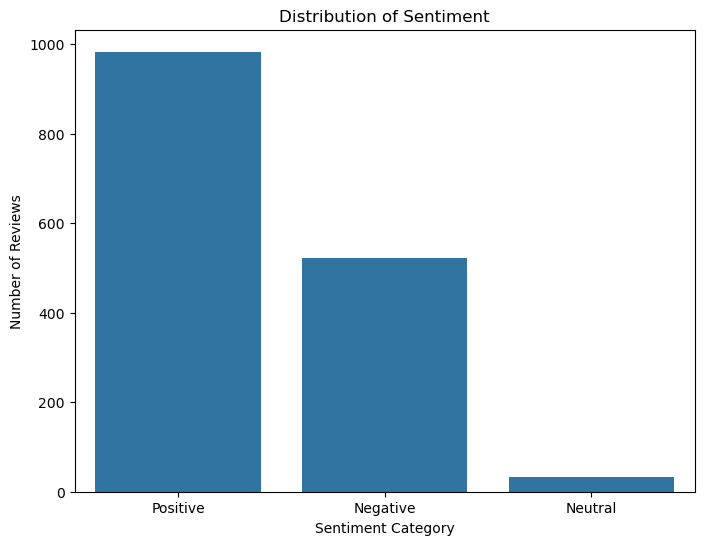

In [157]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

## 9. Sentiment by Travel Type


Sentiment Distribution by Travel Type:
sentiment       Negative   Neutral  Positive
Travel Type                                 
Business        0.298450  0.019380  0.682171
Couple Leisure  0.365672  0.017413  0.616915
Family Leisure  0.382609  0.028986  0.588406
Solo Leisure    0.312150  0.022430  0.665421


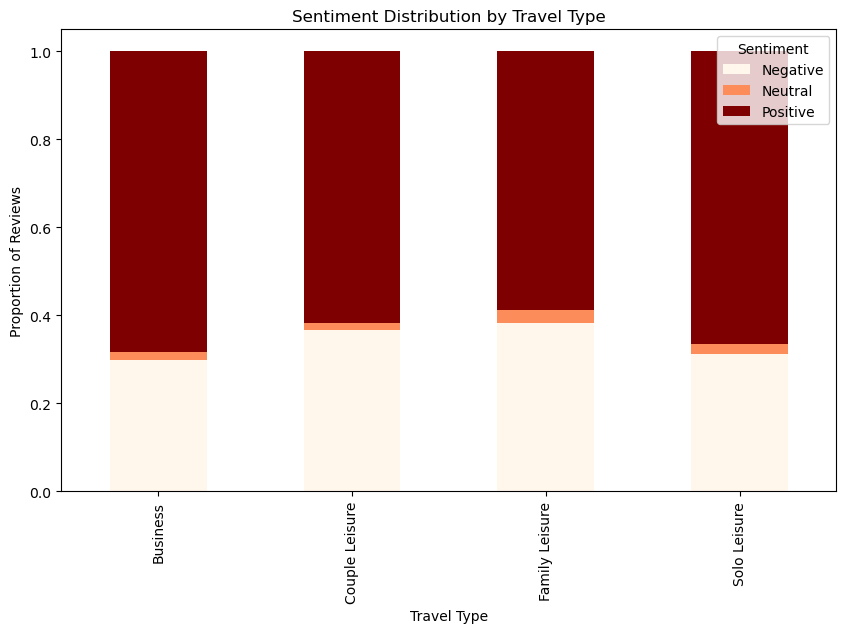

In [168]:
if 'Travel Type' in df.columns:
    sentiment_by_travel_type = df.groupby('Travel Type')['sentiment'].value_counts(normalize=True).unstack(fill_value=0)
    print("\nSentiment Distribution by Travel Type:")
    print(sentiment_by_travel_type)
    sentiment_by_travel_type.plot(kind='bar', stacked=True, figsize=(10, 6),cmap='OrRd')
    plt.title('Sentiment Distribution by Travel Type')
    plt.xlabel('Travel Type')
    plt.ylabel('Proportion of Reviews')
    plt.legend(title='Sentiment')
    plt.show()
else:
    print("\n'Travel Type' column not found, skipping analysis by travel type.")


## 10. Sentiment Over Time


Sentiment Trends Over Time:
sentiment   Negative   Neutral  Positive
month_year                              
2015-12     0.000000  0.000000  1.000000
2016-01     0.192308  0.038462  0.769231
2016-02     0.095238  0.000000  0.904762
2016-03     0.200000  0.000000  0.800000
2016-04     0.384615  0.000000  0.615385
...              ...       ...       ...
2024-04     0.500000  0.000000  0.500000
2024-05     0.454545  0.000000  0.545455
2024-06     0.500000  0.000000  0.500000
2024-07     0.428571  0.000000  0.571429
2024-08     0.500000  0.000000  0.500000

[101 rows x 3 columns]


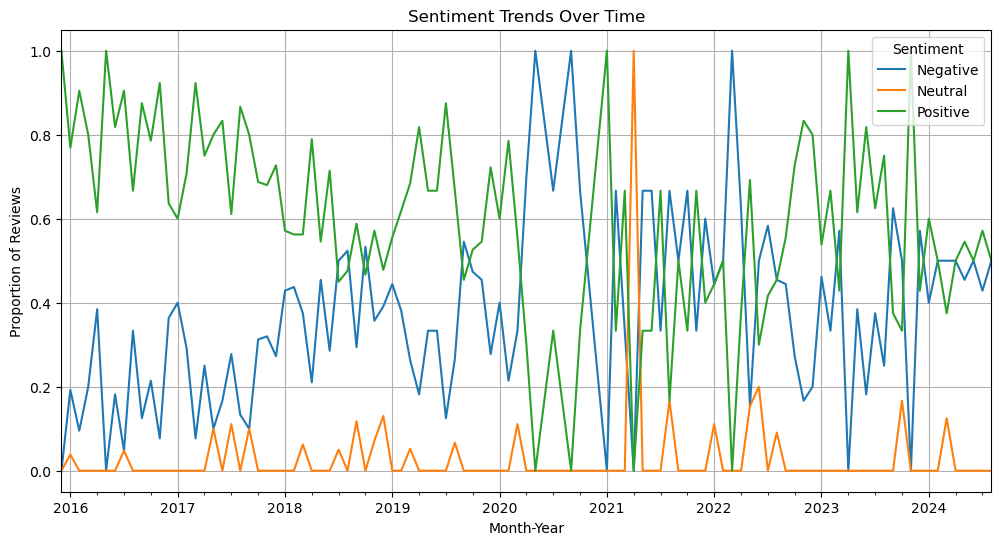

In [183]:
if 'Date Published' in df.columns:
    df['month_year'] = df['Date Published'].dt.to_period('M')
    sentiment_over_time = df.groupby('month_year')['sentiment'].value_counts(normalize=True).unstack(fill_value=0)
    print("\nSentiment Trends Over Time:")
    print(sentiment_over_time)
    sentiment_over_time.plot(kind='line', figsize=(12, 6))
    plt.title('Sentiment Trends Over Time')
    plt.xlabel('Month-Year')
    plt.ylabel('Proportion of Reviews')
    plt.legend(title='Sentiment')
    plt.grid(True)
    plt.show()
else:
    print("\n'Date Published' column not found, skipping sentiment analysis over time.")
 

## 11. Relationship between Numerical Ratings and Sentiment

C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\3736294879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")


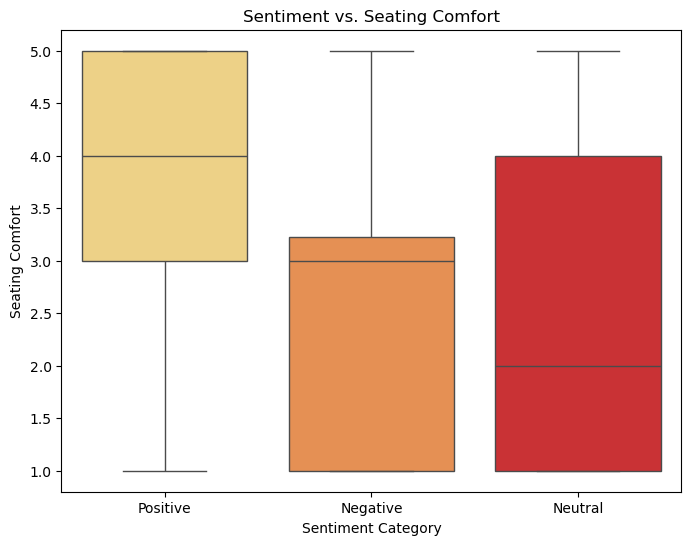

C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\3736294879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")


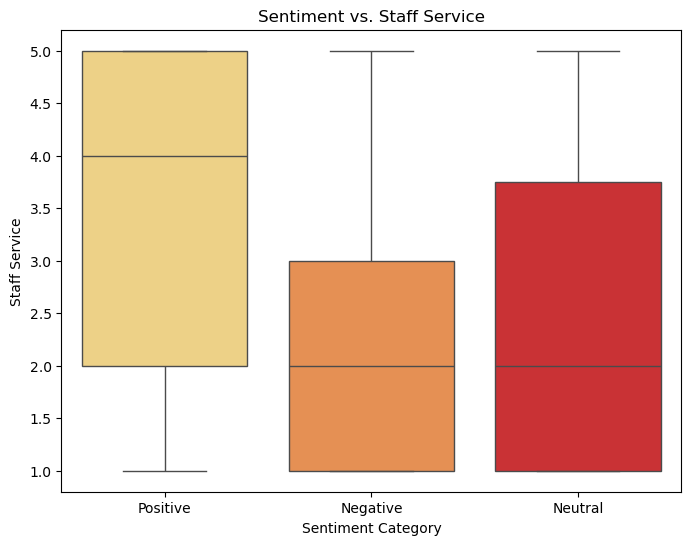

C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\3736294879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")


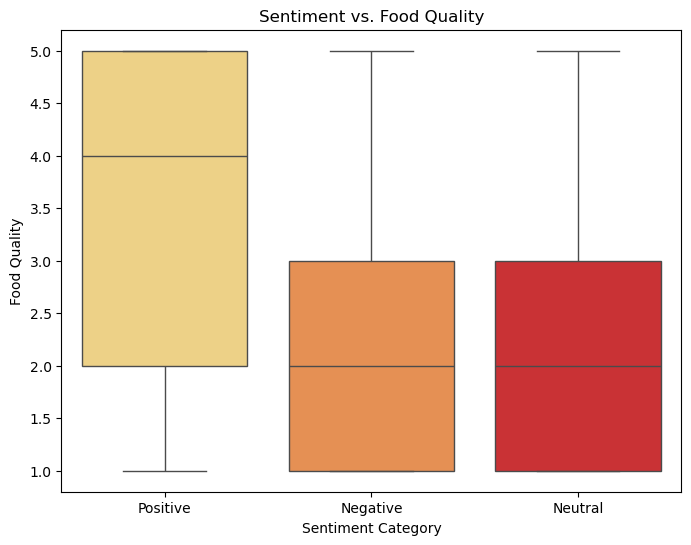

C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\3736294879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")


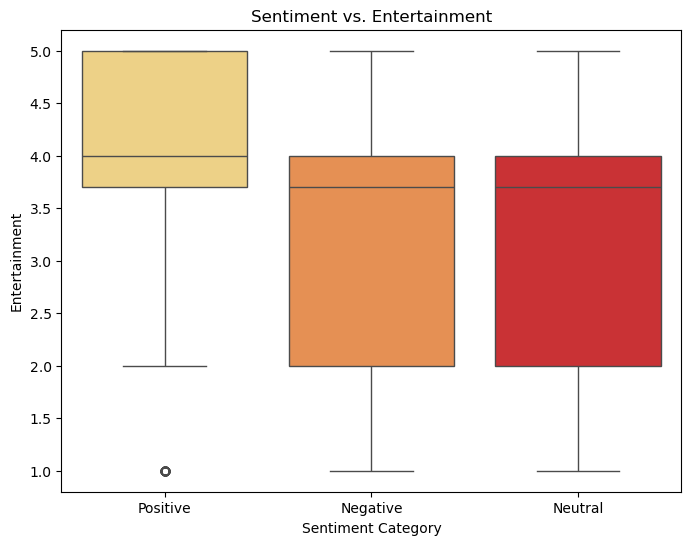

C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\3736294879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")


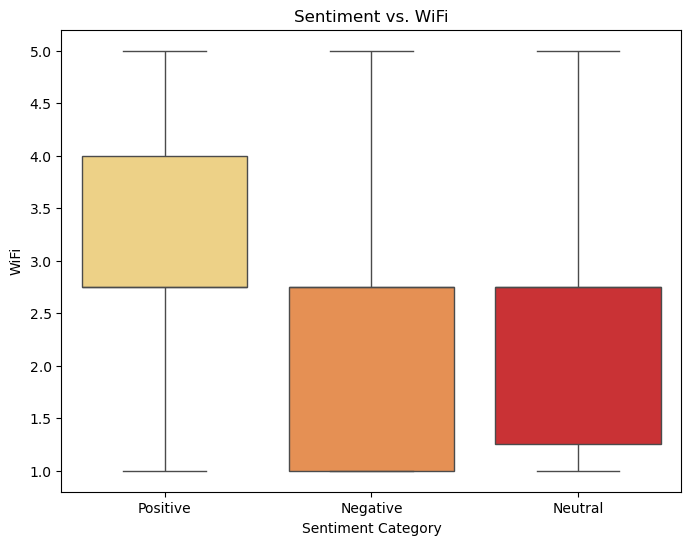

C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\3736294879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")


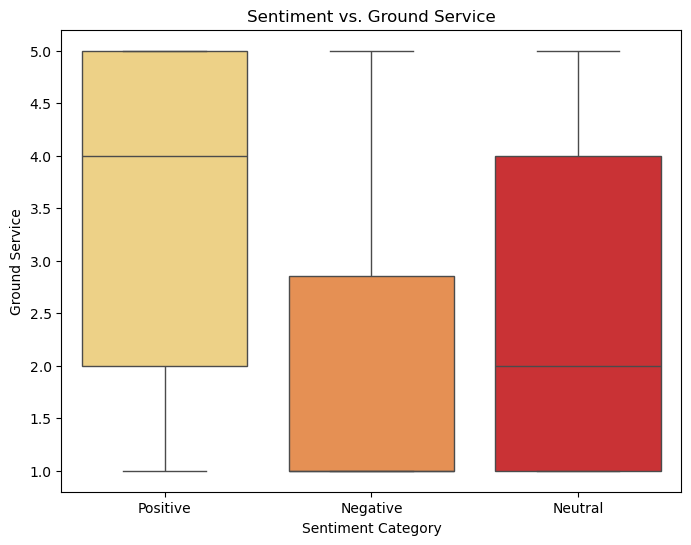

C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\3736294879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")


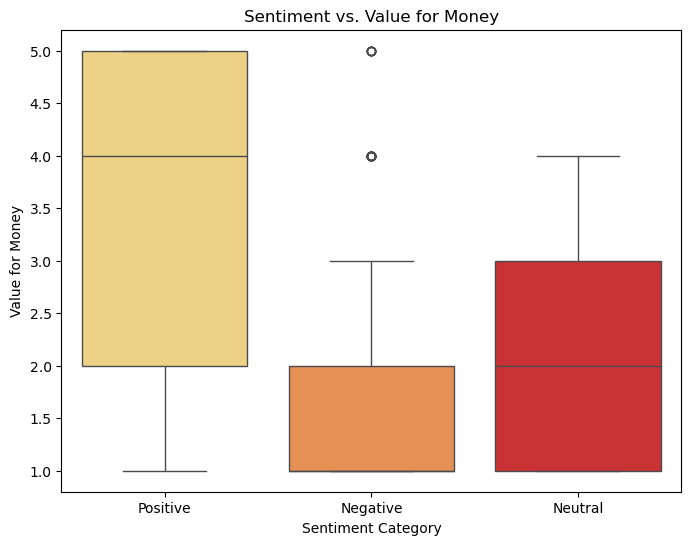

C:\Users\sufya\AppData\Local\Temp\ipykernel_14956\3736294879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")


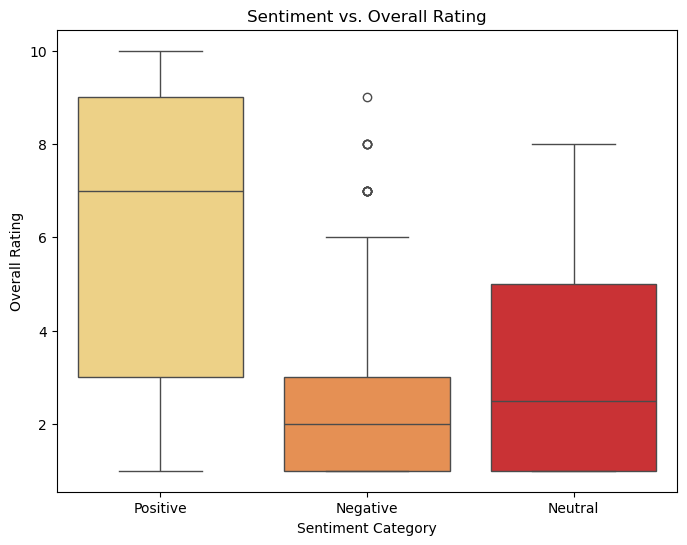

In [190]:
for rating_col in rating_columns:
    if rating_col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='sentiment', y=rating_col, data=df,palette="YlOrRd")
        plt.title(f'Sentiment vs. {rating_col}')
        plt.xlabel('Sentiment Category')
        plt.ylabel(rating_col)
        plt.show()
    else:
        print(f"\nColumn '{rating_col}' not found, skipping boxplot.")
